# Error Bars


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import numpy as np

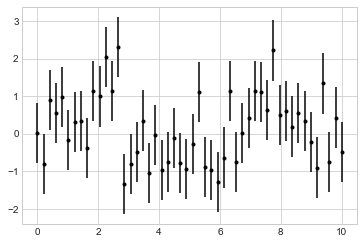

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt=".k");

## Continuous Errors

In [13]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata  = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Computer the Gaussian process fit
gp = GaussianProcess(corr="cubic", theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000) 
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma => 95% cinfidence region

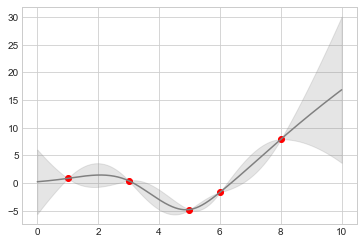

In [22]:
# Visualize the result
plt.plot(xdata, ydata, "or")
plt.plot(xfit, yfit, "-", color="grey")

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color="grey", alpha=0.2); # X Value, Lower Y Bound, Upper Y Bound